In [2]:
from dataclasses import replace
from matplotlib import pyplot as plt
from pulser.devices import Chadoq2, AnalogDevice
from pulser.channels.dmm import DMM
from pulser.register import Register
from pulser.register.register_layout import RegisterLayout
from pulser.register.mappable_reg import MappableRegister
from pulser.register.weight_maps import DetuningMap
from pulser_simulation import QutipEmulator
from pulser.waveforms import InterpolatedWaveform
from pulser.sampler import sampler
from pulser.sequence import Sequence
from pulser.pulse import Pulse
from pulser.waveforms import ConstantWaveform, RampWaveform
import numpy as np

In [3]:
dmm = DMM(
    clock_period=4,
    min_duration=16,
    max_duration=2**26,
    mod_bandwidth=8,
    bottom_detuning=-800,  # detuning between 0 and -20 rad/µs
)
Chadoq3 = replace(
    Chadoq2.to_virtual(),
    dmm_objects=(dmm, DMM()),
    reusable_channels=True,
    max_radial_distance=100,
    rydberg_level = 70,
    max_atom_num = 100
)

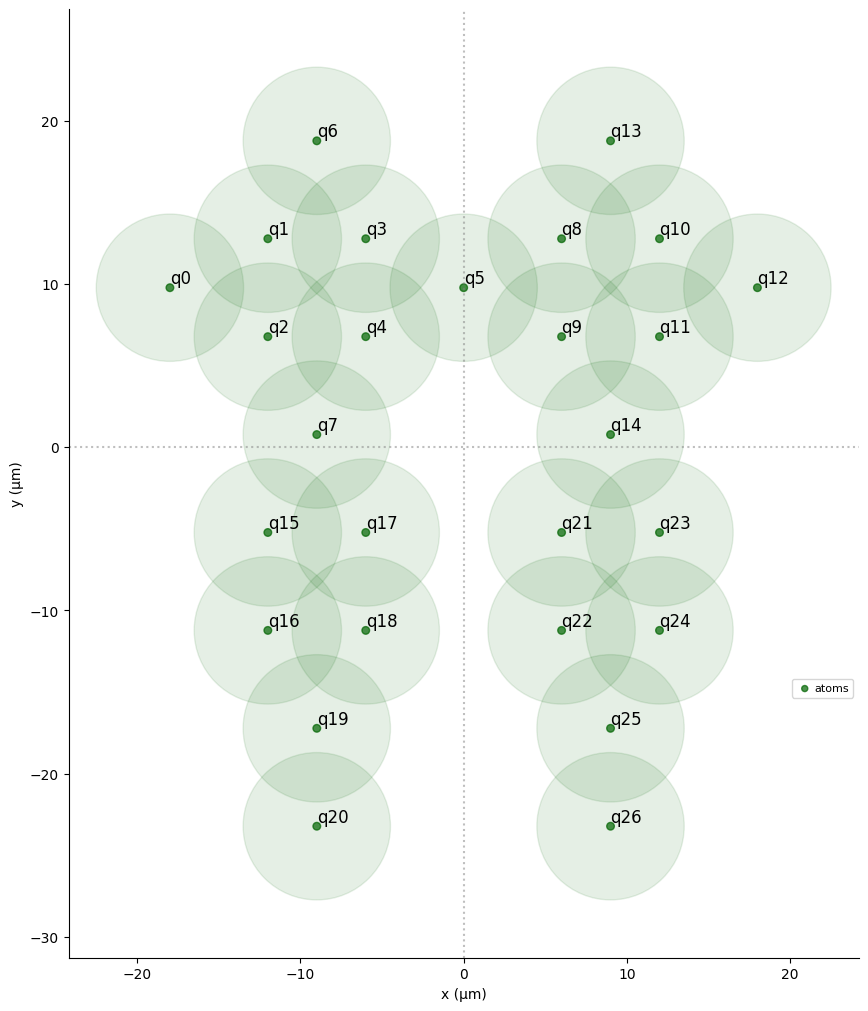

In [4]:
L = 6.0
omega_max = 10

trap_coordinates = [
    (0, L/2),
    (L, L),
    (L, 0),
    (2*L, L),
    (2*L, 0),
    (3*L, L/2),
    (3*L/2, 2*L),
    (3*L/2, -L),
    (4*L, L),
    (4*L, 0),
    (5*L, L),
    (5*L, 0),
    (6*L, L/2),
    (4.5*L, 2*L),
    (4.5*L, -L),
    (L, -2*L),
    (L, -3*L),
    (2*L, -2*L),
    (2*L, -3*L),
    (3/2*L, -4*L),
    (3/2*L, -5*L),
    (4*L, -2*L),
    (4*L, -3*L),
    (5*L, -2*L),
    (5*L, -3*L),
    (4.5*L, -4*L),
    (4.5*L, -5*L),
]

register_layout = RegisterLayout(trap_coordinates)
register = Register.from_coordinates(trap_coordinates, center=True, prefix="q")
register.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(omega_max),
    draw_graph=False,
    draw_half_radius=True,
)